<a href="https://colab.research.google.com/github/ayyucedemirbas/machine_learning_algorithms/blob/master/random_forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas

In [5]:
df = pandas.read_csv("https://raw.githubusercontent.com/ayyucedemirbas/machine_learning_algorithms/master/iris.csv")

In [8]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [25]:
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Species'. 
df['species']= label_encoder.fit_transform(df['species']) 

df['species'].unique()

array([0, 1, 2])

In [26]:
from sklearn.model_selection import train_test_split

X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y=df['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
predicted = clf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9111111111111111


In [29]:
from sklearn import datasets

iris = datasets.load_iris()

species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

'versicolor'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


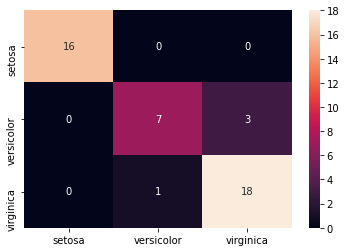

In [34]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)